In [2]:
!pip install pydub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pydub import AudioSegment
from pydub.utils import get_array_type
import os
import array
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as spio
from scipy.io import wavfile
from scipy.signal import butter, filtfilt
from PIL import Image


In [ ]:
sound = AudioSegment.from_mp3('voyager.mp3')
samplerate = AudioSegment.frame_count(sound)
#check this out to get better stuff
left = sound.split_to_mono()[0]
bit_depth = left.sample_width * 8
array_type = get_array_type(bit_depth)

numeric_array = array.array(array_type, left._data)
data = numeric_array

In [ ]:
wav_fname = "D:\\Git\\Voyager_Golden_Record\\mono_left.wav"
#spio.wavfile.read(wav_fname)
samplerate, data = spio.wavfile.read(wav_fname)
length = data.shape[0] / samplerate
print(f"length = {length}s")
time = np.linspace(0., length, data.shape[0])
#plt.plot(time, data[:], label="Left channel")
#plt.xlabel("Time [s]")
#plt.ylabel("Amplitude")
#plt.show()

length = 947.7119954648526s


start at 30.0, end at 30.049886621315192  
start at 30.049886621315192, end at 30.099773242630384  
start at 30.099773242630384, end at 30.14965986394558  
start at 30.14965986394558, end at 30.199546485260772  
start at 30.199546485260772, end at 30.249433106575964  
start at 30.249433106575964, end at 30.299319727891156  
start at 30.299319727891156, end at 30.349206349206348  
start at 30.349206349206348, end at 30.399092970521544  
start at 30.399092970521544, end at 30.448979591836736  
start at 30.448979591836736, end at 30.498866213151928  
start at 30.498866213151928, end at 30.54875283446712  
start at 30.54875283446712, end at 30.598639455782312  
start at 30.598639455782312, end at 30.648526077097507  
start at 30.648526077097507, end at 30.6984126984127  
start at 30.6984126984127, end at 30.74829931972789  
start at 30.74829931972789, end at 30.798185941043084  
start at 30.798185941043084, end at 30.848072562358276  
start at 30.848072562358276, end at 30.897959183673468 

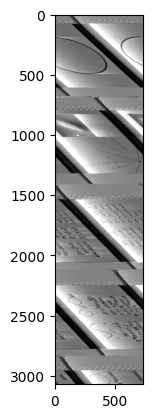

In [ ]:
from scipy.signal import butter, filtfilt
image_data = []
window_size = 2200
line_hz = samplerate / window_size
nyquist = samplerate / 2
Wn = line_hz / nyquist
adjust_offset = 0
offset = samplerate*30  
for index in range(1024):
    window = data[offset+index*window_size:offset+(index+1)*window_size]
    print(f"start at {(offset+index*window_size)/samplerate}, end at {(offset+(index+1)*window_size)/samplerate}  ")
    b, a = butter(3, Wn, 'highpass',analog='false')
    x = filtfilt(b, a, window)
    x = np.clip(x,-2500,2750)
    image_data.append(-0.5*x[int(2*window_size/3):int(window_size)-1])
    # print(int(window_size/3))
    # print(int(2*window_size/3))
    # print(int(window_size))
    image_data.append(-0.5*x[int(window_size/3):int(2*window_size/3)])
    image_data.append(-0.5*x[0:int(window_size/3)])

    
plt.imshow(image_data,cmap="gray")
plt.show()

start at 30.052154195011337, end at 30.102040816326532  
start at 30.102040816326532, end at 30.151927437641724  
start at 30.151927437641724, end at 30.201814058956916  
start at 30.201814058956916, end at 30.25170068027211  
start at 30.25170068027211, end at 30.3015873015873  
start at 30.3015873015873, end at 30.351473922902493  
start at 30.351473922902493, end at 30.401360544217688  
start at 30.401360544217688, end at 30.45124716553288  
start at 30.45124716553288, end at 30.501133786848072  
start at 30.501133786848072, end at 30.551020408163264  
start at 30.551020408163264, end at 30.600907029478456  
start at 30.600907029478456, end at 30.650793650793652  
start at 30.650793650793652, end at 30.700680272108844  
start at 30.700680272108844, end at 30.750566893424036  
start at 30.750566893424036, end at 30.800453514739228  
start at 30.800453514739228, end at 30.85034013605442  
start at 30.85034013605442, end at 30.900226757369616  
start at 30.900226757369616, end at 30.95

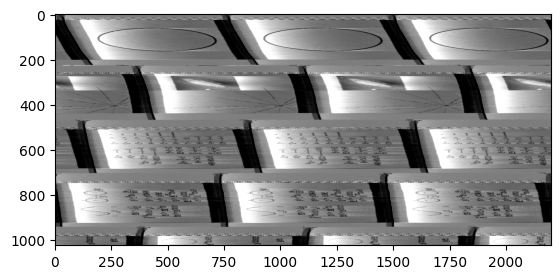

In [ ]:
from scipy.signal import butter, filtfilt
image_data = []
window_size = 2200
line_hz = samplerate / window_size
nyquist = samplerate / 2
Wn = line_hz / nyquist
adjust_offset = window_size/(3.8*220)
offset = samplerate*30 +2300 
for index in range(1024):
    window = data[offset+index*window_size + int(adjust_offset*index):offset+(index+1)*window_size + int(adjust_offset*index)]
    print(f"start at {(offset+index*window_size)/samplerate}, end at {(offset+(index+1)*window_size)/samplerate}  ")
    b, a = butter(3, Wn, 'highpass',analog='false')
    x = filtfilt(b, a, window)
    x = np.clip(x,-2500,2500)
    image_data.append(-0.5*x[0:window_size])
plt.imshow(image_data,cmap="gray")
plt.show()

best one 16/01/2023 23:59
0
1
2
3
4
6
7
8
9
11
12
13
14
15
17
18
19
20
22
23
24
25
26
28
29
30
31
33
34
35
36
37
39
40
41
42
44
45
46
47
48
50
51
52
53
55
56
57
58
59
61
62
63
64
66
67
68
69
70
72
73
74
75
77
78
79
80
81
83
84
85
86
88
89
90
91
92
94
95
96
97
99
100
101
102
103
105
106
107
108
110
111
112
113
114
116
117
118
119
121
122
123
124
126
127
128
129
130
132
133
134
135
137
138
139
140
141
143
144
145
146
148
149
150
151
152
154
155
156
157
159
160
161
162
163
165
166
167
168
170
171
172
173
174
176
177
178
179
181
182
183
184
185
187
188
189
190
192
193
194
195
196
198
199
200
201
203
204
205
206
207
209
210
211
212
214
215
216
217
218


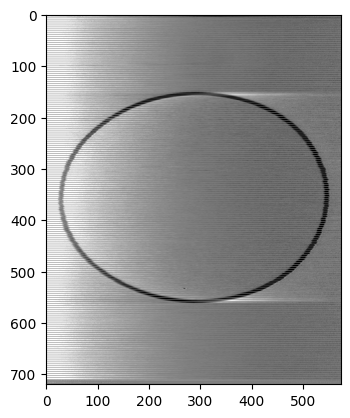

In [ ]:
print("best one 16/01/2023 23:59")
from scipy.signal import butter, filtfilt
image_data = []
window_size = 2202
window_size = 734
line_hz = samplerate / (6*window_size)
nyquist = samplerate / 2
Wn = line_hz / nyquist
offset = int(samplerate*31.25)
buufer = 50  
for index in range(180):
    adjust = int(index *window_size/600)
    print(adjust)
    window1 = data[offset+0*window_size+buufer + adjust + 100:offset+1*window_size+buufer + adjust - 60]
    window2 = data[offset+1*window_size+buufer + adjust + 100:offset+2*window_size+buufer + adjust - 60]
    window3 = data[offset+2*window_size+buufer + adjust + 100:offset+3*window_size+buufer + adjust - 60]


    b, a = butter(3, Wn, 'highpass',analog='false')
    x1 = filtfilt(b, a, window1)
    x2 = filtfilt(b, a, window2)
    x3 = filtfilt(b, a, window3)


    w1 = np.clip(x1,-2500,2500)
    w2 = np.clip(x2,-2500,2500)
    w3= np.clip(x3,-2500,2500)

    padding = np.zeros(len(w3))
    image_data.append(-1*w1[0:len(w1)])
    image_data.append(-1*w2[0:len(w2)])
    image_data.append(-1*w3[0:len(w3)])
    image_data.append(padding)



    offset = offset + 3*window_size  

    #print(offset)
plt.imshow(image_data,cmap="gray")
plt.show()

0.0
0
0.049931972789115646
1
0.09986394557823129
2
0.14979591836734693
3
0.19972789115646258
4
0.24965986394557824
6
0.29959183673469386
7
0.3495238095238095
8
0.39945578231292517
9
0.4493877551020408
10
0.4993197278911565
12
0.5492517006802721
13
0.5991836734693877
14
0.6491156462585034
15
0.699047619047619
17
0.7489795918367347
18
0.7989115646258503
19
0.848843537414966
20
0.8987755102040816
21
0.9487074829931973
23
0.998639455782313
24
1.0485714285714285
25
1.0985034013605441
26
1.1484353741496598
28
1.1983673469387754
29
1.248299319727891
30
1.2982312925170068
31
1.3481632653061224
32
1.398095238095238
34
1.4480272108843537
35
1.4979591836734694
36
1.547891156462585
37
1.5978231292517007
39
1.6477551020408163
40
1.697687074829932
41
1.7476190476190476
42
1.7975510204081633
43
1.847482993197279
45
1.8974149659863946
46
1.9473469387755102
47
1.997278911564626
48
2.0472108843537415
50
2.097142857142857
51
2.147074829931973
52
2.1970068027210883
53
2.246938775510204
54
2.29687074829931

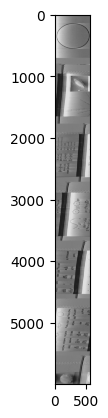

In [ ]:

#todo: try to write adjust depending on the offset and not the index
from scipy.signal import butter, filtfilt
image_data = []
window_size = 2202
window_size = 734
line_hz = samplerate / (6*window_size)
nyquist = samplerate / 2
Wn = line_hz / nyquist
offset = int(samplerate*31.25)
buufer = 50  
for index in range(1500):
    adjust = int((offset - samplerate*31.25)/samplerate *window_size/30)
    print((offset - samplerate*31.25)/samplerate)
    print(adjust)
    window1 = data[offset+0*window_size+buufer + adjust + 100:offset+1*window_size+buufer + adjust - 60]
    window2 = data[offset+1*window_size+buufer + adjust + 100:offset+2*window_size+buufer + adjust - 60]
    window3 = data[offset+2*window_size+buufer + adjust + 100:offset+3*window_size+buufer + adjust - 60]


    b, a = butter(3, Wn, 'highpass',analog='false')
    x1 = filtfilt(b, a, window1)
    x2 = filtfilt(b, a, window2)
    x3 = filtfilt(b, a, window3)

    w1 = np.clip(x1,-2500,2500)
    w2 = np.clip(x2,-2500,2500)
    w3= np.clip(x3,-2500,2500)

    padding = np.zeros(len(w3))
    image_data.append(-1*w1[0:len(w1)])
    image_data.append(-1*w2[0:len(w2)])
    image_data.append(-1*w3[0:len(w3)])
    image_data.append(padding)



    offset = offset + 3*window_size  

    #print(offset)
plt.imshow(image_data,cmap="gray")
plt.show()

36.0
880
36.04993197278912
882
36.09986394557823
883
36.149795918367346
884
36.19972789115646
885
36.24965986394558
886
36.29959183673469
888
36.34952380952381
889
36.39945578231293
890
36.44938775510204
891
36.499319727891155
893
36.54925170068027
894
36.59918367346939
895
36.6491156462585
896
36.69904761904762
897
36.748979591836736
899
36.79891156462585
900
36.848843537414965
901
36.89877551020408
902
36.9487074829932
904
36.99863945578231
905
37.04857142857143
906
37.098503401360546
907
37.14843537414966
908
37.198367346938774
910
37.24829931972789
911
37.29823129251701
912
37.34816326530612
913
37.39809523809524
915
37.448027210884355
916
37.49795918367347
917
37.54789115646258
918
37.5978231292517
919
37.64775510204082
921
37.69768707482993
922
37.74761904761905
923
37.797551020408164
924
37.84748299319728
926
37.89741496598639
927
37.94734693877551
928
37.99727891156463
929
38.04721088435374
930
38.097142857142856
932
38.147074829931974
933
38.19700680272109
934
38.2469387755102

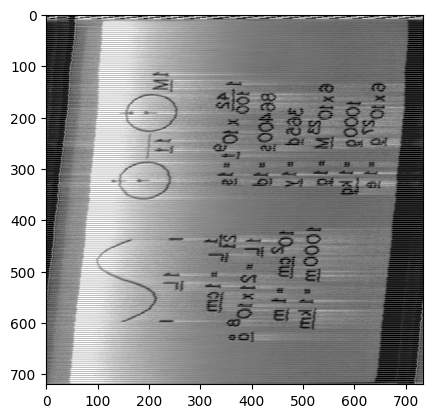

In [ ]:
#try with new adsjut
#todo: try to write adjust depending on the offset and not the index
from scipy.signal import butter, filtfilt
image_data = []
window_size = 2202
window_size = 734
line_hz = samplerate / (6*window_size)
nyquist = samplerate / 2
Wn = line_hz / nyquist
offset = int(samplerate*67.25)
buufer =  -400 
for index in range(180):
    adjust = int((offset - samplerate*31.25)/samplerate *window_size/30)
    print((offset - samplerate*31.25)/samplerate)
    print(adjust)
    window1 = data[offset+0*window_size+buufer + adjust :offset+1*window_size+buufer + adjust ]
    window2 = data[offset+1*window_size+buufer + adjust :offset+2*window_size+buufer + adjust ]
    window3 = data[offset+2*window_size+buufer + adjust :offset+3*window_size+buufer + adjust ]


    b, a = butter(3, Wn, 'highpass',analog='false')
    x1 = filtfilt(b, a, window1)
    x2 = filtfilt(b, a, window2)
    x3 = filtfilt(b, a, window3)
   

    w1 = np.clip(x1,-2500,2500)
    w2 = np.clip(x2,-2500,2500)
    w3= np.clip(x3,-2500,2500)

    padding = np.zeros(len(w3))
    image_data.append(-1*w1[0:len(w1)])
    image_data.append(-1*w2[0:len(w2)])
    image_data.append(-1*w3[0:len(w3)])
    image_data.append(padding)

    offset = offset + 3*window_size  

    #print(offset)
plt.imshow(image_data,cmap="gray")
plt.show()

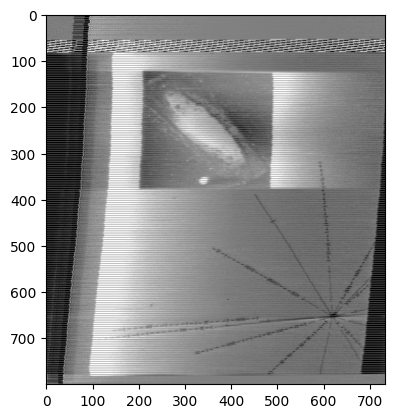

In [ ]:
# second image - 17/01 00:24 
from scipy.signal import butter, filtfilt
image_data = []
window_size = 2202
window_size = 734
line_hz = samplerate / (6*window_size)
nyquist = samplerate / 2
Wn = line_hz / nyquist
#adjust_offset = (window_size)/(600)
offset = int(samplerate*42.25)
buufer = -200  
for index in range(200):
    adjust = int(index *window_size/600)
    #print(adjust)
    window1 = data[offset+0*window_size+buufer + adjust :offset+1*window_size+buufer + adjust ]
    window2 = data[offset+1*window_size+buufer + adjust :offset+2*window_size+buufer + adjust ]
    window3 = data[offset+2*window_size+buufer + adjust :offset+3*window_size+buufer + adjust ]

    b, a = butter(3, Wn, 'highpass',analog='false')
    x1 = filtfilt(b, a, window1)
    x2 = filtfilt(b, a, window2)
    x3 = filtfilt(b, a, window3)

    w1 = np.clip(x1,-2500,2500)
    w2 = np.clip(x2,-2500,2500)
    w3= np.clip(x3,-2500,2500)

    padding = np.zeros(len(w3))
    image_data.append(-1*w1[0:len(w1)])
    image_data.append(-1*w2[0:len(w2)])
    image_data.append(-1*w3[0:len(w3)])
    image_data.append(padding)

    offset = offset + 3*window_size  

plt.imshow(image_data,cmap="gray")
plt.show()

try 5 windows


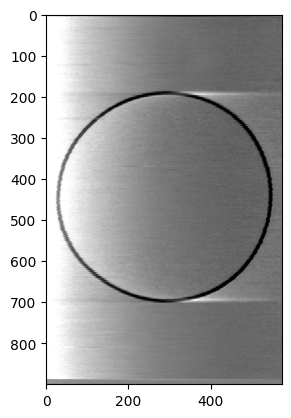

In [ ]:
print("try 5 windows")
from scipy.signal import butter, filtfilt
image_data = []
window_size = 2202
window_size = 734
line_hz = samplerate / (3*window_size)
nyquist = samplerate / 2
Wn = line_hz / nyquist
offset = int(samplerate*31.25)
buufer = 50  
for index in range(180):
    adjust = int(index *window_size/600)
    #print(adjust)
    window1 = data[offset+0*window_size+buufer + adjust + 100:offset+1*window_size+buufer + adjust - 60]
    window2 = data[offset+1*window_size+buufer + adjust + 100:offset+2*window_size+buufer + adjust - 60]
    window3 = data[offset+2*window_size+buufer + adjust + 100:offset+3*window_size+buufer + adjust - 60]
    window4 = data[offset+3*window_size+buufer + adjust + 100:offset+4*window_size+buufer + adjust - 60]
    window5 = data[offset+4*window_size+buufer + adjust + 100:offset+5*window_size+buufer + adjust - 60]

    b, a = butter(3, Wn, 'highpass',analog='false')
    x1 = filtfilt(b, a, window1)
    x2 = filtfilt(b, a, window2)
    x3 = filtfilt(b, a, window3)
    x4 = filtfilt(b, a, window4)
    x5 = filtfilt(b, a, window5)

    w1 = np.clip(x1,-2500,2500)
    w2 = np.clip(x2,-2500,2500)
    w3= np.clip(x3,-2500,2500)
    w4= np.clip(x4,-2500,2500)   
    w5= np.clip(x5,-2500,2500)

    padding = np.zeros(len(w3))
    image_data.append(-1*w1[0:len(w1)])
    image_data.append(-1*w2[0:len(w2)])
    image_data.append(-1*w3[0:len(w3)])
    #image_data.append(padding)
    image_data.append(-1*w4[0:len(w4)])
    image_data.append(-1*w5[0:len(w5)])

    offset = offset + 3*window_size  

    #print(offset)
plt.imshow(image_data,cmap="gray")
plt.show()

20/1/23 15:42 
try 5 windows with for and global adjust


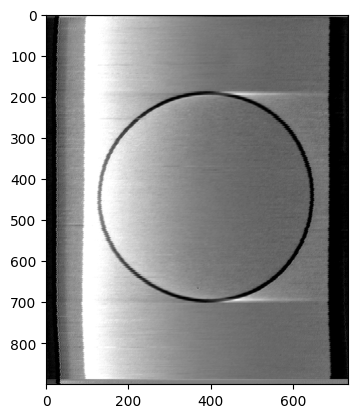

In [ ]:
#working' need to deal woth diagonal and duplicates
print("20/1/23 15:42 ")
print("try 5 windows with for and global adjust")
from scipy.signal import butter, filtfilt
image_data = []
window_size = 734
line_hz = samplerate / (3*window_size)
nyquist = samplerate / 2
Wn = line_hz / nyquist
window = np.zeros([1,window_size])

offset = int(samplerate*31.25) #start time
buufer = 50  

for index in range(180):
    b, a = butter(3, Wn, 'highpass',analog='true')
    #adjust = int(index *window_size/600)
    adjust = int((1.0*offset - samplerate*31.25)/samplerate *window_size/30) 

    for j in range(5):
        window = data[offset+j*window_size+buufer + adjust  :offset+(j+1)*window_size+buufer + adjust ]
        x = filtfilt(b, a, window)
        w = np.clip(x,-2500,2500)
        image_data.append(-1*w[0:len(w)])
        #plt.plot(range(len(w)), w[:])

    offset = offset + 3*window_size  
plt.imshow(image_data,cmap="gray")
plt.show()

In [1]:
# random image - 17/01 00:24 
from scipy.signal import butter, filtfilt
image_data = []
window_size = 2202
window_size = 734
line_hz = samplerate / (3*window_size)
nyquist = samplerate / 2
Wn = line_hz / nyquist
#adjust_offset = (window_size)/(600)
offset = int(samplerate*495)
buufer = 200  
for index in range(200):
    adjust = int(index *window_size/600)
    #print(adjust)
    window1 = data[offset+0*window_size+buufer + adjust :offset+1*window_size+buufer + adjust ]
    window2 = data[offset+1*window_size+buufer + adjust :offset+2*window_size+buufer + adjust ]
    window3 = data[offset+2*window_size+buufer + adjust :offset+3*window_size+buufer + adjust ]

    x1 = filtfilt(b, a, window1)
    x2 = filtfilt(b, a, window2)
    x3 = filtfilt(b, a, window3)

    w1 = np.clip(x1,-2500,2500)
    w2 = np.clip(x2,-2500,2500)
    w3= np.clip(x3,-2500,2500)
    
    image_data.append(-1*w1[0:len(w1)])
    image_data.append(-1*w2[0:len(w2)])
    image_data.append(-1*w3[0:len(w3)])
    image_data.append(padding)

    offset = offset + 3*window_size  

plt.imshow(image_data,cmap="gray")
plt.show()

NameError: ignored

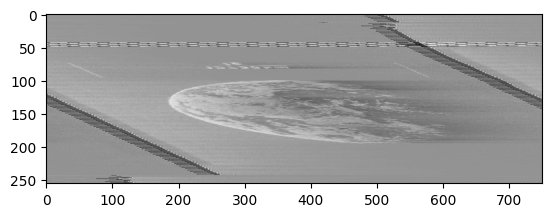

In [ ]:
from scipy.signal import butter, filtfilt
image_data = []
window_size = 2200
line_hz = samplerate / window_size
nyquist = samplerate / 2
Wn = line_hz / nyquist
offset = samplerate*182 +2300 
for index in range(256):
    window = data[offset+index*window_size+1449:offset+(index+1)*window_size ]
    #window3 = window[1499:2199]
    #print(f"start at {(offset+index*window_size)/samplerate}, end at {(offset+(index+1)*window_size)/samplerate}  ")
    b, a = butter(3, Wn, 'highpass',analog='false')
    x = filtfilt(b, a, window)
    image_data.append(-0.5*x[0:len(window)])
plt.imshow(image_data,cmap="gray")
plt.show()